# Homework-2: MLP for MNIST Classification

### In this homework, you need to
- #### implement SGD optimizer (`./optimizer.py`)
- #### implement forward and backward for FCLayer (`layers/fc_layer.py`)
- #### implement forward and backward for SigmoidLayer (`layers/sigmoid_layer.py`)
- #### implement forward and backward for ReLULayer (`layers/relu_layer.py`)
- #### implement EuclideanLossLayer (`criterion/euclidean_loss.py`)
- #### implement SoftmaxCrossEntropyLossLayer (`criterion/softmax_cross_entropy.py`)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

from network import Network
from solver import train, test
from plot import plot_loss_and_acc

## Load MNIST Dataset
We use tensorflow tools to load dataset for convenience.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
def decode_image(image):
    # Normalize from [0, 255.] to [0., 1.0], and then subtract by the mean value
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [784])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # Encode label with one-hot encoding
    return tf.one_hot(label, depth=10)

In [4]:
# Data Preprocessing
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))

x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

## Set Hyerparameters
You can modify hyerparameters by yourself.

In [5]:
batch_size = 100
max_epoch = 20
init_std = 0.01

learning_rate_SGD = 0.001
weight_decay = 0.1

disp_freq = 50

## 1. MLP with Euclidean Loss
In part-1, you need to train a MLP with **Euclidean Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively.
### TODO
Before executing the following code, you should complete **./optimizer.py** and **criterion/euclidean_loss.py**.

In [6]:
from criterion import EuclideanLossLayer
from optimizer import SGD

criterion = EuclideanLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 1.1 MLP with Euclidean Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/fc_layer.py** and **layers/sigmoid_layer.py**.

In [7]:
from layers import FCLayer, SigmoidLayer

sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

In [8]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Instructions for updating:
This is a deprecated API that should only be used in TF 1 graph mode and legacy TF 2 graph mode available through `tf.compat.v1`. In all other situations -- namely, eager mode and inside `tf.function` -- you can consume dataset elements using `for elem in dataset: ...` or by explicitly creating iterator via `iterator = iter(dataset)` and fetching its elements via `values = next(iterator)`. Furthermore, this API is not available in TF 2. During the transition from TF 1 to TF 2 you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)` to create a TF 1 graph mode style iterator for a dataset created through TF 2 APIs. Note that this should be a transient state of your code base as there are in general no guarantees about the interoperability of TF 1 and TF 2 code.
Epoch [0][20]	 Batch [0][550]	 Training Loss 6.9194	 Accuracy 0.0600
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.2668	 Accuracy 0.0816
Epoch [0][20]	 Batch [100][550]	 Training Loss 1.5126	 A

In [9]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.7821.



## 1.2 MLP with Euclidean Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/relu_layer.py**.

In [10]:
from layers import ReLULayer

reluMLP = Network()
# TODO build ReLUMLP with FCLayer and ReLULayer
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [11]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 6.8995	 Accuracy 0.0300
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.9183	 Accuracy 0.0900
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.2551	 Accuracy 0.1107
Epoch [0][20]	 Batch [150][550]	 Training Loss 1.9470	 Accuracy 0.1256
Epoch [0][20]	 Batch [200][550]	 Training Loss 1.7420	 Accuracy 0.1415
Epoch [0][20]	 Batch [250][550]	 Training Loss 1.5971	 Accuracy 0.1578
Epoch [0][20]	 Batch [300][550]	 Training Loss 1.4858	 Accuracy 0.1704
Epoch [0][20]	 Batch [350][550]	 Training Loss 1.3960	 Accuracy 0.1828
Epoch [0][20]	 Batch [400][550]	 Training Loss 1.3227	 Accuracy 0.1959
Epoch [0][20]	 Batch [450][550]	 Training Loss 1.2607	 Accuracy 0.2081
Epoch [0][20]	 Batch [500][550]	 Training Loss 1.2072	 Accuracy 0.2205

Epoch [0]	 Average training loss 1.1598	 Average training accuracy 0.2340
Epoch [0]	 Average validation loss 0.6453	 Average validation accuracy 0.3958

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.6191	 Accuracy 0.3800

In [12]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.8575.



## Plot

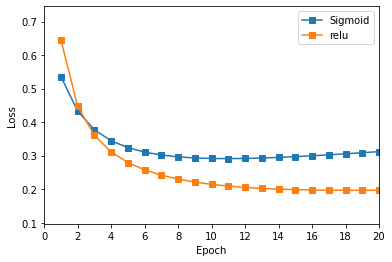

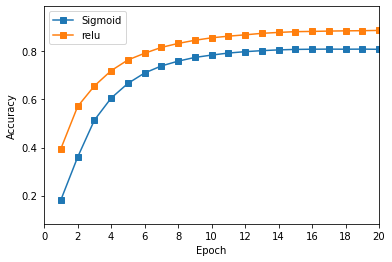

In [13]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 2. MLP with Softmax Cross-Entropy Loss
In part-2, you need to train a MLP with **Softmax Cross-Entropy Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively again.
### TODO
Before executing the following code, you should complete **criterion/softmax_cross_entropy_loss.py**.

In [14]:
from criterion import SoftmaxCrossEntropyLossLayer

criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 2.1 MLP with Softmax Cross-Entropy Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Softmax cross-entropy loss function.

In [15]:
sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

### Train

In [16]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.5391	 Accuracy 0.1000
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.5017	 Accuracy 0.1398
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.4645	 Accuracy 0.1369
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.4437	 Accuracy 0.1370
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.4251	 Accuracy 0.1345
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.4065	 Accuracy 0.1357
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.3913	 Accuracy 0.1356
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.3769	 Accuracy 0.1368
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.3629	 Accuracy 0.1397
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.3510	 Accuracy 0.1431
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.3407	 Accuracy 0.1456

Epoch [0]	 Average training loss 2.3304	 Average training accuracy 0.1497
Epoch [0]	 Average validation loss 2.2246	 Average validation accuracy 0.1934

Epoch [1][20]	 Batch [0][550]	 Training Loss 2.2182	 Accuracy 0.1800

### Test

In [17]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.6839.



## 2.2 MLP with Softmax Cross-Entropy Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Softmax cross-entropy loss function.

In [18]:
reluMLP = Network()
# Build ReLUMLP with FCLayer and ReLULayer
# 128 is the number of hidden units, you can change by your own
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [19]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.4610	 Accuracy 0.2300
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.5230	 Accuracy 0.1602
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.4827	 Accuracy 0.1696
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.4349	 Accuracy 0.1825
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.3909	 Accuracy 0.1958
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.3443	 Accuracy 0.2111
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.3004	 Accuracy 0.2266
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.2652	 Accuracy 0.2401
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.2294	 Accuracy 0.2546
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.1961	 Accuracy 0.2695
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.1634	 Accuracy 0.2850

Epoch [0]	 Average training loss 2.1335	 Average training accuracy 0.2995
Epoch [0]	 Average validation loss 1.7714	 Average validation accuracy 0.5000

Epoch [1][20]	 Batch [0][550]	 Training Loss 1.6592	 Accuracy 0.5800

In [20]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.8681.



## Plot

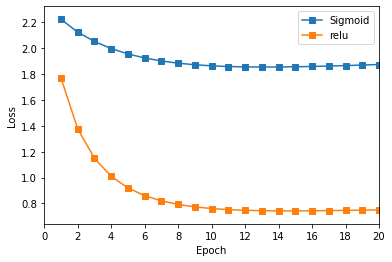

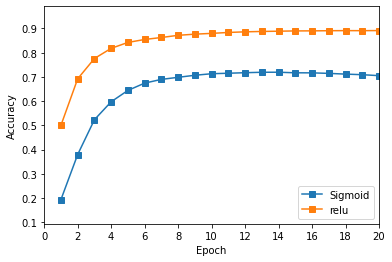

In [21]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

### ~~You have finished homework2-mlp, congratulations!~~  

**Next, according to the requirements 4) of report:**
### **You need to construct a two-hidden-layer MLP, using any activation function and loss function.**

**Note: Please insert some new cells blow (using '+' bottom in the toolbar) refer to above codes. Do not modify the former code directly.**

## 3. MLP with two hidden layer
**Softmax Cross-Entropy loss** and **ReLU Activation Function** will be used.

In [66]:
batch_size = 100
max_epoch = 20

learning_rate_SGD = 0.001
weight_decay = 0.2

disp_freq = 50

In [67]:
from criterion import SoftmaxCrossEntropyLossLayer

criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

In [68]:
reluMLP = Network()
# Build MLP with FCLayer and ReLULayer
# 128 is the number of hidden units, you can change by your own
reluMLP.add(FCLayer(784, 512))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(512, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [69]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.3902	 Accuracy 0.0800
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.3386	 Accuracy 0.1586
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.2389	 Accuracy 0.2002
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.1713	 Accuracy 0.2366
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.1139	 Accuracy 0.2754
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.0592	 Accuracy 0.3124
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.0118	 Accuracy 0.3417
Epoch [0][20]	 Batch [350][550]	 Training Loss 1.9725	 Accuracy 0.3655
Epoch [0][20]	 Batch [400][550]	 Training Loss 1.9325	 Accuracy 0.3904
Epoch [0][20]	 Batch [450][550]	 Training Loss 1.8999	 Accuracy 0.4106
Epoch [0][20]	 Batch [500][550]	 Training Loss 1.8675	 Accuracy 0.4293

Epoch [0]	 Average training loss 1.8368	 Average training accuracy 0.4477
Epoch [0]	 Average validation loss 1.4683	 Average validation accuracy 0.6722

Epoch [1][20]	 Batch [0][550]	 Training Loss 1.4620	 Accuracy 0.7200

In [70]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.7108.



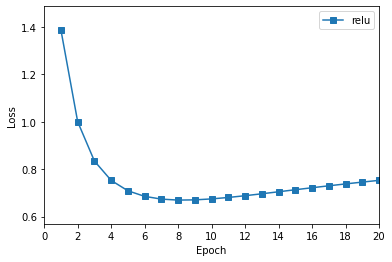

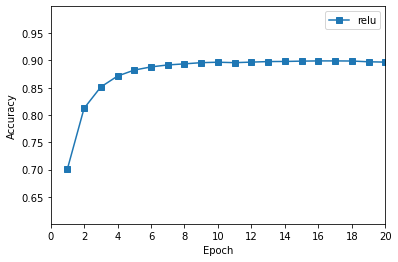

In [30]:
plot_loss_and_acc({'relu': [relu_loss, relu_acc]})